In [1]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


In [23]:
def clean_data(text):
    
    stop_words = set(stopwords.words('english'))
    stop_words.update(['.', ',','@','$','%' ,'"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}']) # remove it if you need punctuation 
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = []

    for w in word_tokens:
        if w not in stop_words:
            filtered_sentence.append(w)


    return filtered_sentence


In [47]:
df=pd.read_csv('output_got2.csv',encoding='ISO-8859-1',skip_blank_lines=True,delimiter=',')
df=df.drop('Unnamed: 4',1)
df=df.drop('Unnamed: 5',1)
df=df.drop('Unnamed: 6',1)
df=df.drop('Unnamed: 3',1)


df['text']=df['text'].str.replace('[^a-zA-Z0-9]'," ")
list_temp=[]
for temp in df['text']:
    temp2=clean_data(str(temp))
    list_temp.append(temp2)
tweet=pd.Series(list_temp)
df['new_tweet']=tweet.values
df=df.drop('Unnamed: 2',1)
df=df.drop('text',1)

df.to_csv('new_output.csv',encoding='utf-8')

In [4]:
!pip install TextBlob

You are using pip version 8.1.2, however version 9.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [25]:
from textblob import TextBlob

In [48]:
def get_Tweet_Sentiment(tweet):
    analysis= TextBlob(tweet)
    if analysis.sentiment.polarity>0:
        return "Positive"
    elif analysis.sentiment.polarity==0:
        return "Nutral"
    else:
        return "Negative"

In [68]:
list_temp2=[]
for i in df['new_tweet']:
    list_temp2.append(' '.join(map(str, i)))

df['join_tweet']=tweet2.values

list_senti=[]
for j in df['join_tweet']:
    list_senti.append(get_Tweet_Sentiment(j))
    

tweet_senti=pd.Series(list_senti)
df['Sentiments']=tweet_senti.values
df['date'] = pd.to_datetime(df['date']).apply(lambda x: x.date())

temp_df=df



In [69]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline


In [70]:
temp_df=temp_df.drop('new_tweet',1)


In [39]:
import datetime
from matplotlib.dates import date2num

In [71]:
graph_df=temp_df.groupby(['date','Sentiments']).count()
graph_df.head()

join_tweet
date       Sentiments            
2016-10-13 Negative           217
           Nutral             933
           Positive           515
2016-10-14 Negative           330
           Nutral            2067

In [72]:
graph_df.unstack().head()

join_tweet                
Sentiments   Negative Nutral Positive
date                                 
2016-10-13        217    933      515
2016-10-14        330   2067      708
2016-10-15        284   1941      666
2016-10-16        268   1867      596
2016-10-17        320   2287      753

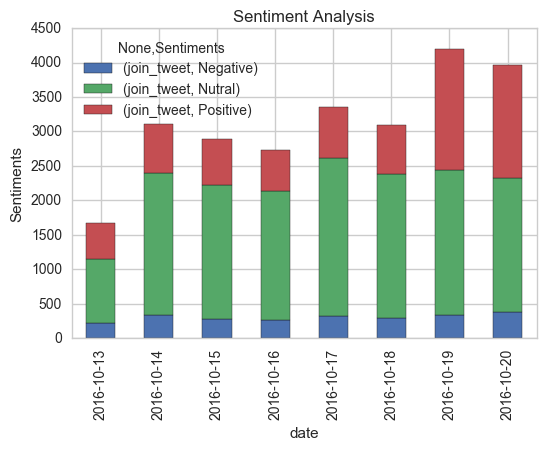

In [73]:
my_plot = graph_df.unstack().plot(kind='bar',stacked=True,title="Sentiment Analysis")
my_plot.set_xlabel("date")
my_plot.set_ylabel("Sentiments")

In [79]:
graph_date=temp_df.groupby('date').count()
graph_date=graph_date.drop('join_tweet',1)
graph_date.head()

,Sentiments
date,
2016-10-13,1665
2016-10-14,3105
2016-10-15,2891
2016-10-16,2731
2016-10-17,3360


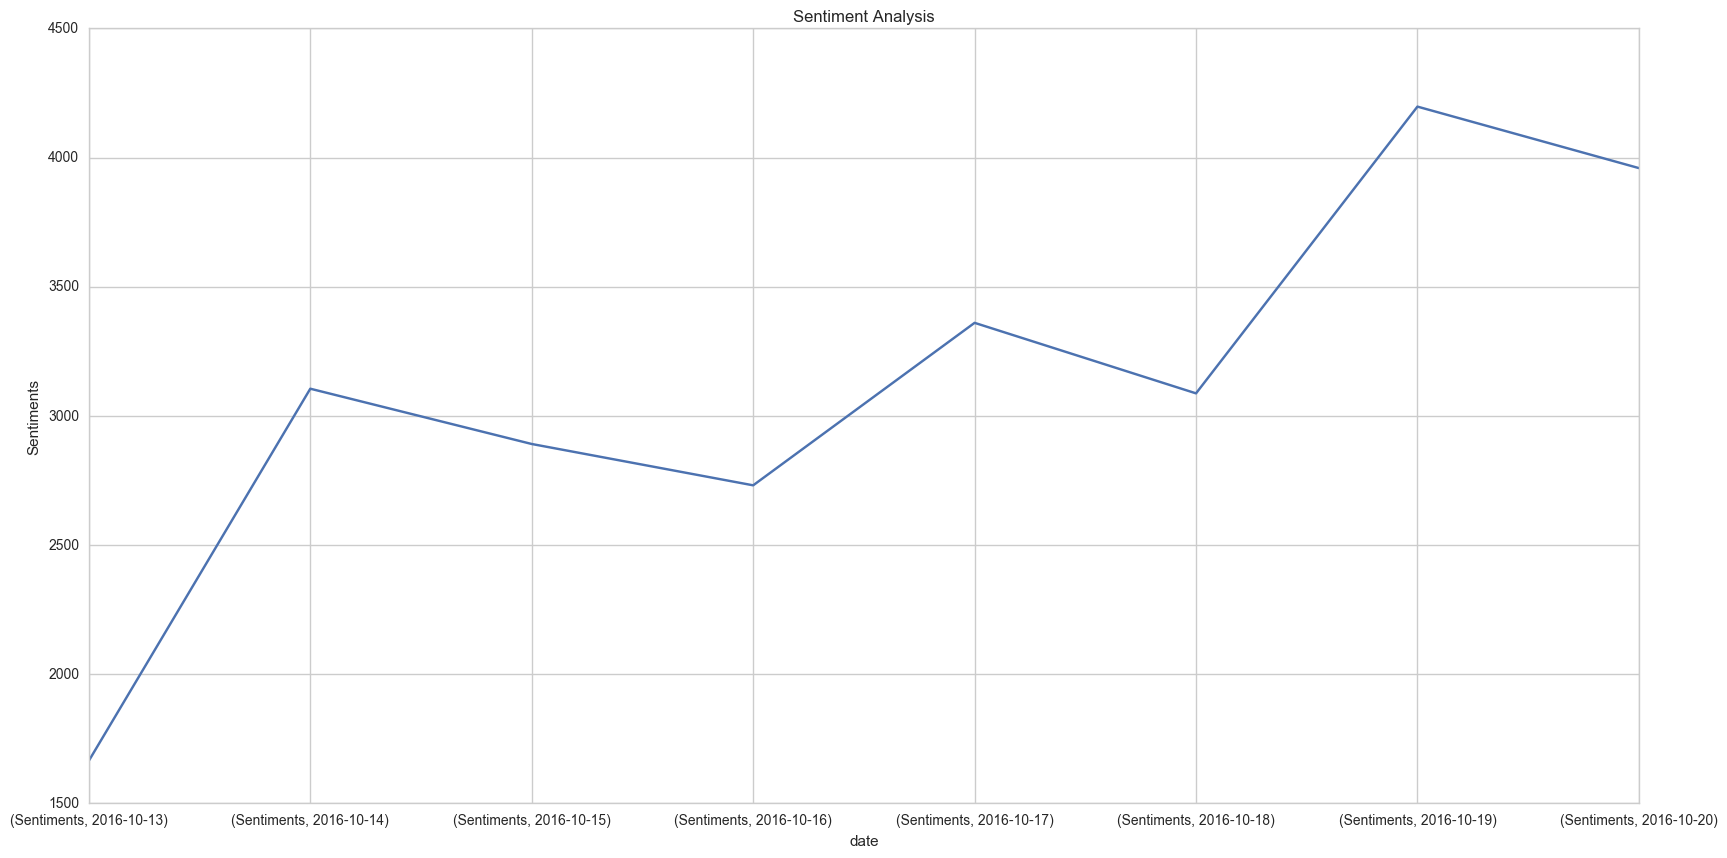

In [80]:
my_plot_date = graph_date.unstack().plot(kind='line',stacked=True,title="Sentiment Analysis",figsize=(20,10))
my_plot_date.set_xlabel("date")
my_plot_date.set_ylabel("Sentiments")
#my_plot_date.
#my_plot_date.figure(figsize=(20,10))